# Perturbation Theory

We deal here with the calculation of the second-order corrections to the normal and anomalous Green's functions in the MTI-SC heterostructure, using a perturbative approach in the interacting picture.


## **Tunneling**

In order to evaluate the second order corrections to the MTI Green's functions, we need to make some specific assumption on the spatial dependence of the coupling functions $\gamma_{\sigma \lambda}^{\sigma'}(z,z') \equiv \gamma_{\sigma \lambda}^{\sigma'} f(z,z')$.
In the following, we model the tunneling as
$$
    f(z,z') = \gamma_{\sigma \lambda}^{\sigma'} \,
    \delta(z+z'-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  \,,
$$
where the Dirac delta pairs only electrons which are found at the same distance from the interface $z=d$.
Moreover, we assume that the tunneling amplitude decreases away from the interface following a Gaussian distribution with a tunneling length $\lambda_{tun}$.
Obviously, with this assumption, the function $f(z,z') = f(z',z)$ does not depend on the order of the coordinates
$$
\begin{split}
    f(z',z) &= 
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(z'-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack  = \\[5pt]
    %
    &=
    \delta(z'+z-2d) \exp  \Biggl\lbrack -\frac{(2d-z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = \\[5pt]
    %
    &=
    \delta(z+z'-2d) \exp  \Biggl\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \Biggr\rbrack = f(z,z') \,.
\end{split}
$$
where the Dirac delta imposes $z'=2d-z$.

In [1]:
import numpy as np

from GreenFunctions_MTI import GFexact
from GreenFunctions_SC import GFnormal, GFnormalMat, GFanomalous, GFanomalousMat

# Hamiltonian parameters
params=dict(C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6)


# function for tunneling amplitude 
def spatial_tunneling(z, d, lT, threshold=1E-6):

    # Gaussian tunneling amplitude
    fz = np.exp( -(z-d)**2/(2*lT**2) )

    # return with cut-off at given threshold
    return fz if fz > threshold else 0.


## **Normal Green's Function**


The normal MTI Green's function in the Heisenberg representation
$$
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
    -i \left\langle
    T_t \hat{\psi}_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
    \right\rangle \,,
$$
can be expressed using interacting picture in perturbative series as
$$
\begin{split}
	\mathcal{G}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	%
	\frac{
	\bra{\phi_0} T_t 
	{\psi}_{\sigma\lambda}(zt) 
	{V}(t_1) \dots {V}(t_n)	
	{\psi}^\dagger_{\sigma'\lambda'}(z't') 
    \ket{\phi_0}
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,,
\end{split}
$$
and the leading-order correction can be evaluated as
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=&
	\sum_{ss't} \sum_{rr'l}
	\int dt_1 \, \int dt_2 \, \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(zt, w t_1)
	\mathcal{G}^{(0)}_{s',r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v t_2, z't')
	- \\[5pt]
	%
	& -	
        \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(zt, z't')
	\mathcal{G}^{(0)}_{s' r'}(w' t_1, v' t_2)
	\mathcal{G}^{(0)}_{rl, st}(v t_2, w t_1)
	\Bigr\} \,.
\end{split}
$$
The corresponding Feynman diagram is plotted in the picture below.


<p style="text-align:center;">
<img src="Correction_NormalGF.png" width=85% height=85% class="center" />
</p>



Since the Hamiltonian does not depend explicitly on time, we can transform to frequency space through
$$
%
$$
the above equation can be expressed as
$$
\begin{split}
	\mathcal{G}^{(2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
	=
	\sum_{ss't} \sum_{rr'l}
	& \int dw \, dw' \, \int dv \, dv' \,
	\gamma_{st}^{s'}(w,w') \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
	%
	& \times
	\Bigl\{
	\mathcal{G}^{(0)}_{\sigma\lambda, st}(z, w; \omega)
	\mathcal{G}^{(0)}_{s',r'}(w',v'; \omega)
	\mathcal{G}^{(0)}_{rl, \sigma'\lambda'}(v, z'; \omega)
	\Bigr\} \,,
\end{split}
$$
and in matrix notation becomes
$$
\boxed{
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    =
    \int dw \, dw' \, dv \, dv' \;
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma(w,w') \,
    \mathcal{G}_{SC}^{(0)}(w',v'; \omega) \,
    \Gamma^{\dagger}(v',v) \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) 
} \,.
$$

In [2]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; 
# energies
mu = 0.1; Delta = 0.05; w = 0.025

# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in zMTI])
# compute SC 
zSC = np.linspace(d, 200, 250); gSC = np.array([GFnormal(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=w) for z in zSC])

#### <font color='green'> **Green's Functions** </font> 

The unperturbed Green's function in the topological insulator $\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$  and in the superconductor $\mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega)$ are plotted below as a function of the out-of-plane coordinate $z$.
In our model, the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) = 0 
    \qquad \text{for} \quad z,z' \leq 0 \; \lor \; z,z' \geq d \,,
$$
while the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{G}^{(0)}_{\sigma\sigma'}(z-z';\omega) = 0 
    \qquad \text{for} \quad z-z' \leq d \,.
$$

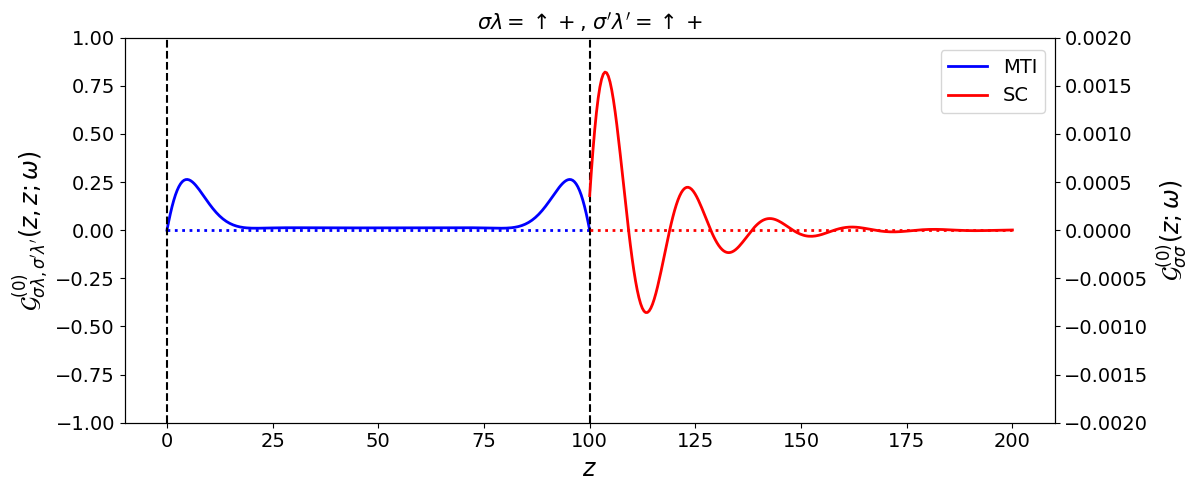

In [3]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 0; j = 0
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')
# plot SC normal Green's function
axSC.plot(zSC, gSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, gSC.real, lw=2, color='red', label='SC')
# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

# SC axis 
axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)
# MTI axis 
axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.9, 0.875));

#### **Leading-Order Correction**

We can now evaluate the second order correction to the normal MTI Green's function
$$
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    =
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(v-w; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) \,.
$$
Using the above assumption for the tunneling function, the second-order correction becomes
$$
\begin{split}
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    &=
    \int dw \, dw' \, dv \, dv' \,
    \delta(w+w'-2d) \tilde{f}(w) \,
    \delta(v+v'-2d) \tilde{f}(v) \times \\[5pt]
    %
    & \qquad \times \, \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma(w,w') \,
    \mathcal{G}_{SC}^{(0)}(w',v'; \omega) \,
    \Gamma^{\dagger}(v',v) \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(2d-w,2d-v; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \Gamma \,
    \mathcal{G}_{SC}^{(0)}(v-w; \omega) \,
    \Gamma^{\dagger} \,
    \mathcal{G}_{MTI}^{(0)}(v, z'; \omega) \,,
\end{split}
$$
where we used the translational invariance of the superconductor $\mathcal{G}_{SC}^{(0)}(z,z'; \omega) \equiv \mathcal{G}_{SC}^{(0)}(z-z'; \omega)$ and defined the tunneling probability amplitude as 
$$
    \tilde{f}(x) \equiv \exp  \left\lbrack -\frac{(z-d)^2}{2 \lambda_{tun}^2} \right\rbrack \,.
$$
It is worth noting that here the integrated variables live in the domain $ 0 \leq w,v \leq d$, since they both refer to electrons in the MTI.

In [7]:
import time
from scipy.integrate import quad, dblquad, quad_vec

# parameters
d = 100.; kx = 0.002; ky = 0.006; L = 0.01; lT = 0.1*d; gamma = 1.
# energies
mu = 0.1; Delta = 0.05; w = 0.01

# coupling matrices
Gamma = np.matrix([[gamma,0],[0,gamma],[gamma,0],[0,gamma]])


# Second order correction to the normal GF
def G_second_order(d, z, Z, kx, ky, L, mu, Delta, omega, Gamma, lT, C = -0.0068, D1 = 1.3, D2 = 19.6, A1 = 2.2, A2 = 4.1, M = 0.28, B1 = 10, B2 = 56.6, t = 1., hbar = 1.):
    
    # function for tunneling amplitude
    def ftun(x): 
        return spatial_tunneling(x, d=d, lT=lT, threshold=1E-4)
    
    # function for G_MTI(z,w)
    def GMTIz(w):
        return GFexact(d=d, z=z, Z=w, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # function for G_MTI(v,z')
    def GMTIZ(v):
        return GFexact(d=d, z=v, Z=Z, kx=kx, ky=ky, L=L, w=omega, C=C, D1=D1, D2=D2, A1=A1, A2=A2, M=M, B1=B1, B2=B2, hbar=hbar)
    
    # function for G_SC(v-w)
    def GSC(w,v):
        return GFnormalMat(z=v-w, kx=kx, ky=ky, mu=mu, Delta=Delta, w=omega, t=t, hbar=hbar)
    
    # inner integral as function I(w)
    intg = lambda w : quad_vec(lambda v : ftun(w)*(GSC(w,v) @ Gamma.H @ GMTIZ(v)), d-3*lT, d)

    t0 = time.time()
    I1 = intg(50)[0].A
    t1 = time.time()
    print(t1-t0)

    
    # compute outer integral
    #return quad( GMTIZ(v)inner_integrand , 0., d, 0., d)

    return

G_second_order(d=d, z=70, Z=35, kx=0., ky=0., L=0., mu=mu, Delta=Delta, omega=w, Gamma=Gamma, lT=lT)

0.3371396064758301


## **Anomalous Green's Function**

The anomalous MTI Green's function in the Heisenberg representation
$$
	\mathcal{F}^\dagger_{\sigma\lambda, \sigma'\lambda'}(zt,z't') =
    -i \left\langle
    T_t \hat{\psi}^\dagger_{\sigma \lambda}(zt) \hat{\psi}^\dagger_{\sigma' \lambda'}(z't')
    \right\rangle \,,
$$
can be expressed using interacting picture in perturbative series as
$$
	\mathcal{F}^\dagger_{\sigma\lambda, \sigma'\lambda'}(zt,z't') 
	=
	\sum_{n=0}^{+\infty} \frac{(-i)^{n+1}}{n!} \int_{-\infty}^{+\infty} dt_1 \, \dots \int_{-\infty}^{+\infty} dt_n \, 
	\frac{
	\bra{\phi_0} T_t 
	{\psi}^\dagger_{\sigma\lambda}(zt) 
	{V}(t_1) \dots {V}(t_n)	
	{\psi}^\dagger_{\sigma'\lambda'}(z't') 
    \ket{\phi_0}
	}
	{\bra{\phi_0} S(+\infty, -\infty) \ket{\phi_0}} \,,
$$
and the leading-order correction can be evaluated as
$$
    \mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega)
    =
    \sum_{ss't} \sum_{rr'l} dt_1 \, dt_2 dw \, dw' \, dv \, dv' \,
    \mathcal{G}^{(0)}_{rl, \sigma\lambda}(v t_2, zt)
    \gamma_{rl}^{r' \, \dagger}(v',v) 
    \mathcal{F}^{\dagger \, (0)}_{r', s'}(v' t_2, w' t_1)
    \gamma_{st}^{s' \, \dagger}(w',w) 
    \mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w t_1, z't') \,.
$$
The corresponding Feynman diagram is plotted in the picture below.


<p style="text-align:center;">
<img src="Correction_AnomalousGF.png" width=85% height=85% class="center" />
</p>


Since the Hamiltonian does not depend explicitly on time, we can transform to frequency space through
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma, \sigma'}(z,z'; \omega) = 
    \int d(t-t') \, e^{i\omega(t-t')} 
    \mathcal{F}^{\dagger \, (0)}_{\sigma, \sigma'}(z,z'; t-t') \,,
$$
the above equation can be expressed as
$$
	\begin{split}
		\mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
		= &
		\sum_{ss't} \sum_{rr'l} 
		\int dw \, dw' \, \int dv \, dv' \,
		\gamma_{st}^{s' \, \dagger}(w',w) \gamma_{rl}^{r' \, \dagger}(v',v) \times \\[5pt]
		& \times \, 
		\mathcal{G}^{(0)}_{rl, \sigma\lambda}(v,z; -\omega)
            \mathcal{F}^{\dagger \, (0)}_{r', s'}(v',w';\omega)
		\mathcal{G}^{(0)}_{st, \sigma'\lambda'}(w,z'; \omega) \,,
	\end{split}
$$
and in matrix notation becomes
$$
    \boxed{
    \mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
    =
    \int dw \, dw' \, dv \, dv' \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(w',w)
    \mathcal{F}^{\dagger \, (0)}_{SC}(w',v';\omega)
    \Gamma^{\dagger}(v',v) 
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega)} \,.
$$

In [5]:
# parameters
d = 100.; kx = 0.007; ky = 0.006; L = 0.005; lT = 0.05*d; 
# energies
mu = 0.1; Delta = 0.05; w = 0.025

# compute MTI normal Green's function
zMTI = np.linspace(0., d, 250); gfMTI = np.array([GFexact(d=d, z=z, Z=z, kx=kx, ky=ky, L=L, w=w) for z in zMTI])
# compute SC 
zSC = np.linspace(d, 200, 250); fSC = np.array([GFanomalous(z=z, Z=0., kx=kx, ky=ky, mu=mu, Delta=Delta, w=w) for z in zSC])

#### <font color='green'> **Anomalous Green's Functions** </font> 

Below, we plot the tunneling amplitude as a function of the $z$ coordinate. 
The unperturbed Green's function in the MTI $\mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega)$ and in the superconductor $\mathcal{F}^{\dagger \, (0)}_{\sigma\sigma'}(z-z';\omega)$ are also shown.
In our model we assumed that the solution for the MTI Green's function is valid only for $0 \leq z,z' \leq d$ and vanishes elsewhere
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma\lambda, \sigma'\lambda'}(z,z';\omega) = 0 
    \qquad \text{for} \quad z,z' \leq 0 \; \lor \; z,z' \geq d \,,
$$
and, similarly, the solution for the superconductor is valid only for $z-z' \geq d$
$$
    \mathcal{F}^{\dagger \, (0)}_{\sigma\sigma'}(z-z';\omega) = 0 
    \qquad \text{for} \qquad \text{for} \quad z-z' \leq d \,.
$$

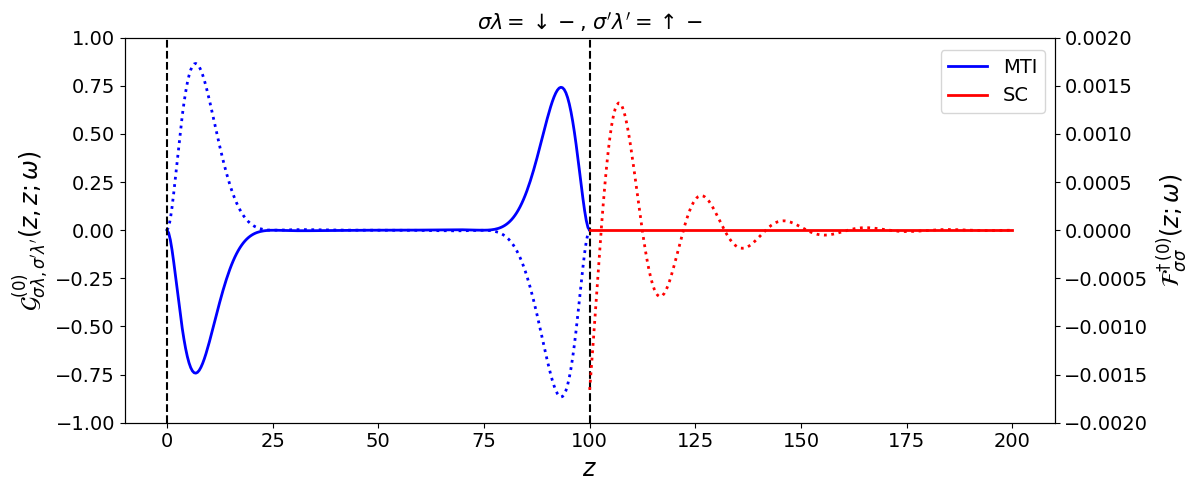

In [6]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

# MTI Green's function component
i = 3; j = 2
# labels for curves
icomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]
jcomp = ["$\\uparrow +$", "$\downarrow +$", "$\\uparrow -$", "$\downarrow -$"]

# figure
fig, axMTI = plt.subplots(figsize=(12, 5)); axSC = axMTI.twinx()

# plot line at the interface
axSC.axvline(x=d, c='black', ls='dashed'); axSC.axvline(x=0, c='black', ls='dashed')
# plot SC normal Green's function
axSC.plot(zSC, fSC.imag, ':', lw=2, color='red'); axSC.plot(zSC, fSC.real, lw=2, color='red', label='SC')
# plot MTI normal Green's function
axMTI.plot(zMTI, gfMTI[:,i,j].imag, ':', lw=2, color='blue'); axMTI.plot(zMTI, gfMTI[:,i,j].real, lw=2, color='blue', label='MTI')

# SC axis 
axSC.set_ylim(-0.002,0.002)
axSC.set_ylabel("$\mathcal{F}^{\dagger \, (0)}_{\sigma\sigma}(z;\omega)$", fontsize = 17)
axSC.tick_params(axis='both', which='major', labelsize=14)
# MTI axis 
axMTI.set_ylim(-1.,1.)
axMTI.set_xlabel("$z$", fontsize = 17)
axMTI.set_ylabel("$\mathcal{G}^{(0)}_{\sigma\lambda, \sigma'\lambda'}(z,z;\omega)$", fontsize = 17)
axMTI.tick_params(axis='both', which='major', labelsize=14)

title = '$\sigma\lambda = $' + icomp[i] + ', $\sigma\' \lambda\' = $' + jcomp[j]
axMTI.set_title(title, fontsize=15)
fig.legend(fontsize = 14, bbox_to_anchor=(0.9, 0.875));

#### **Leading-Order Correction**

We can now evaluate the second order correction to the normal MTI Green's function
$$
    \mathcal{F}^{\dagger \, (2)}_{\sigma\lambda, \sigma'\lambda'}(z,z'; \omega) 
    =
    \int dw \, dw' \, dv \, dv' \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(w',w)
    \mathcal{F}^{\dagger \, (0)}_{SC}(w',v';\omega)
    \Gamma^{\dagger}(v',v) 
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) \,.
$$ 
Using the above assumption for the tunneling function, the second-order correction becomes
$$
\begin{split}
    \mathcal{G}_{MTI}^{(2)}(z,z'; \omega)
    &=
    \int dw \, dw' \, dv \, dv' \,
    \delta(w+w'-2d) \tilde{f}(w) \,
    \delta(v+v'-2d) \tilde{f}(v) \times \\[5pt]
    %
    & \qquad \times \, \mathcal{G}_{MTI}^{(0)}(z, w; \omega) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}(w',w)
    \mathcal{F}^{\dagger \, (0)}_{SC}(w',v';\omega)
    \Gamma^{\dagger}(v',v) 
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(2d-w,2d-v;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) = \\[5pt]
    %%%
    &=
    \int dw \, dv \,
    \tilde{f}(w) \, \tilde{f}(v) \,
    \left\lbrack \mathcal{G}^{(0)}_{MTI}(w,z; -\omega) \right\rbrack^T
    \Gamma^{\star}
    \mathcal{F}^{\dagger \, (0)}_{SC}(v-w;\omega)
    \Gamma^{\dagger}
    \mathcal{G}^{(0)}_{MTI}(v,z'; \omega) \,,
\end{split}
$$
where we used the translational invariance of the superconductor $\mathcal{F}_{SC}^{\dagger \, (0)}(z,z'; \omega) \equiv \mathcal{F}_{SC}^{\dagger \, (0)}(z-z'; \omega)$.
It is worth noting that here the integrated variables live in the domain $ 0 \leq w,v \leq d$, since they both refer to electrons in the MTI. MTI.